<a href="https://colab.research.google.com/github/laya7171/playground/blob/main/lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd

In [85]:
df = pd.read_csv("/content/placement.csv")

In [86]:
df.head(5)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [87]:
df.isnull().sum()

,0
Unnamed: 0,0
cgpa,0
iq,0
placement,0


In [88]:
df.duplicated().sum()

np.int64(0)

In [89]:
df.shape

(100, 4)

In [90]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [91]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X = df.iloc[:,:2]
y = df.iloc[:,-1]

In [94]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [95]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [96]:
import matplotlib.pyplot as plt


<Axes: >

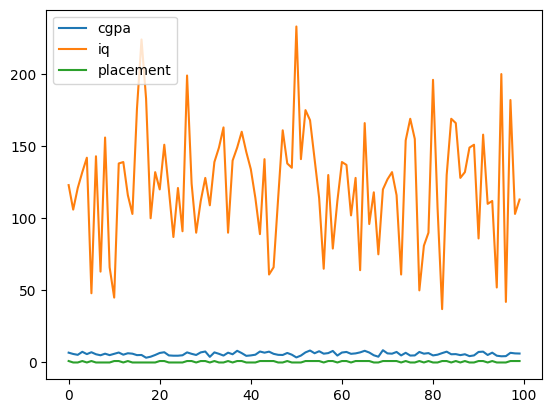

In [97]:
df.plot()

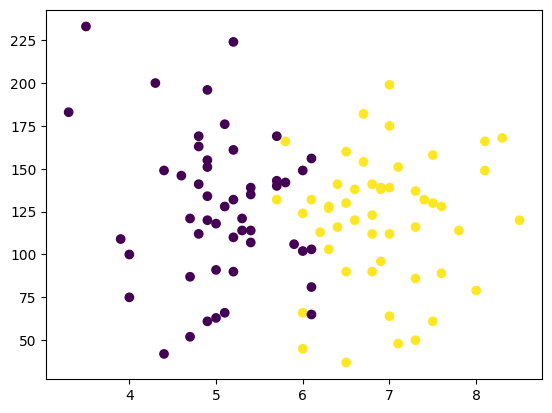

In [98]:
plt.scatter(df['cgpa'],df['iq'], c = df['placement'])

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
lr = LogisticRegression()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
ss = StandardScaler()

In [104]:
X_train_scaled = ss.fit_transform(X_train)

In [105]:
# y_train_scaled = ss.transform(y_train) # y_train does not need to be scaled for fitting the model

In [115]:
X_test_scaled = ss.transform(X_test)

In [116]:
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [117]:
lr.predict(X_test_scaled)

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1])

In [119]:
y_test

,placement
83,1
53,1
70,1
45,1
44,1
39,0
22,0
80,0
10,1
0,1


In [120]:
from sklearn.metrics import accuracy_score

In [121]:
score = accuracy_score(y_test, lr.predict(X_test_scaled))

In [122]:
print(score)

0.92


In [123]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

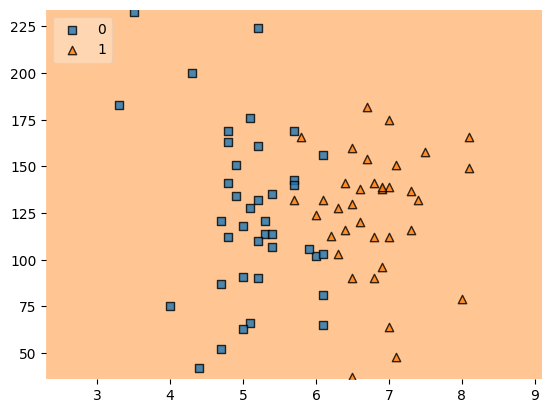

In [125]:
plot_decision_regions(X_train.values, y_train.values, clf = lr, legend = 2)

In [126]:
import pickle

In [127]:
pickle.dump(lr, open("model.pkl",'wb'))